In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-23 21:31:51.506462


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1170.0670)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.4577)tensor(5.7409)tensor(4.1276)tensor(4.1016)tensor(4.5918)tensor(2.5441)tensor(7.3446)tensor(3.2528)tensor(3.3295)tensor(3.4315)tensor(4.6605)tensor(3.0738)tensor(3.4741)tensor(4.8084)tensor(3.6484)tensor(3.9608)tensor(4.6557)tensor(2.9192)tensor(3.8949)tensor(4.3093)tensor(8.5634)tensor(4.2896)tensor(5.8888)tensor(4.4104)tensor(6.7460)tensor(8.1436)tensor(5.9145)tensor(6.4890)tensor(6.6712)tensor(8.7156)tensor(6.6655)tensor(4.9924)tensor(7.6890)tensor(11.7860)tensor(4.4865)tensor(4.2715)tensor(8.2696)tensor(7.0312)tensor(5.7922)tensor(5.0494)tensor(3.0883)tensor(5.3383)tensor(5.6221)tensor(4.3206)tensor(4.1708)tensor(4.6793)tensor(7.1807)tensor(7.5885)tensor(7.8039)tensor(5.4180)tensor(2.8375)tensor(4.2353)tensor(3.8660)tensor(4.3102)tensor(5.3112)tensor(5.5226)tensor(4.5351)tensor(4.4599)tensor(4.7675)tensor(6.2219)tensor(3.1361)tensor(4.2031)tensor(5.6639)tensor(7.2224)tensor(5.7864)tensor(3.6177)tensor(3.1784)tensor(3.4083)tensor(3.2086)tensor(5.8609)tensor(3.1958)tenso

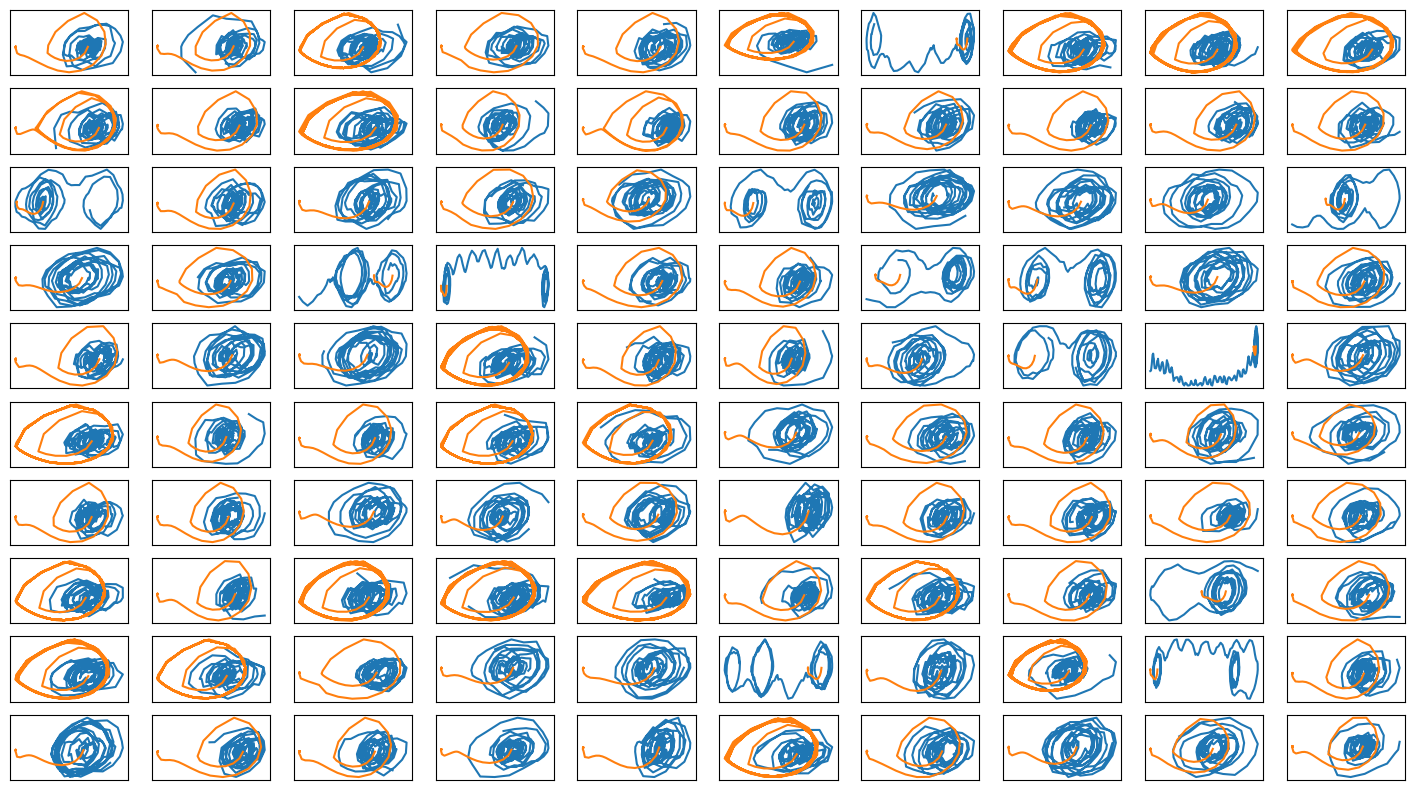

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 95530.70391  validloss 564.51436±0.00000  bestvalidloss 564.51436  last_update 0
train: iter 1  trainloss 1959.60247  validloss 502.83696±0.00000  bestvalidloss 502.83696  last_update 0
train: iter 2  trainloss 14459150824.31777  validloss 485.83910±0.00000  bestvalidloss 485.83910  last_update 0
train: iter 3  trainloss 23322.49941  validloss 472.41039±0.00000  bestvalidloss 472.41039  last_update 0
train: iter 4  trainloss 844.96178  validloss 449.06268±0.00000  bestvalidloss 449.06268  last_update 0
train: iter 5  trainloss 613.31912  validloss 434.10026±0.00000  bestvalidloss 434.10026  last_update 0
train: iter 6  trainloss 555.57820  validloss 416.56317±0.00000  bestvalidloss 416.56317  last_update 0
train: iter 7  trainloss 565.36649  validloss 415.41236±0.00000  bestvalidloss 415.41236  last_update 0
train: iter 8  trainloss 522.50282  validloss 419.48594±0.00000  bestvalidloss 415.41236  last_update 1
train: iter 9  trainloss 498.528

train: iter 78  trainloss -221.35049  validloss -336.52361±0.00000  bestvalidloss -362.48026  last_update 1
train: iter 79  trainloss -230.27128  validloss -357.53687±0.00000  bestvalidloss -362.48026  last_update 2
train: iter 80  trainloss -241.37814  validloss -369.24173±0.00000  bestvalidloss -369.24173  last_update 0
train: iter 81  trainloss -240.21109  validloss -383.05335±0.00000  bestvalidloss -383.05335  last_update 0
train: iter 82  trainloss -231.64572  validloss -379.14087±0.00000  bestvalidloss -383.05335  last_update 1
train: iter 83  trainloss -237.55012  validloss -371.36987±0.00000  bestvalidloss -383.05335  last_update 2
train: iter 84  trainloss -248.64837  validloss -395.30233±0.00000  bestvalidloss -395.30233  last_update 0
train: iter 85  trainloss -255.35779  validloss -381.26009±0.00000  bestvalidloss -395.30233  last_update 1
train: iter 86  trainloss -249.82640  validloss -362.79050±0.00000  bestvalidloss -395.30233  last_update 2
train: iter 87  trainloss -2

train: iter 155  trainloss -465.64948  validloss -549.29047±0.00000  bestvalidloss -608.43616  last_update 3
train: iter 156  trainloss -462.80178  validloss -591.07964±0.00000  bestvalidloss -608.43616  last_update 4
train: iter 157  trainloss -459.07172  validloss -584.35335±0.00000  bestvalidloss -608.43616  last_update 5
train: iter 158  trainloss -474.90066  validloss -584.07143±0.00000  bestvalidloss -608.43616  last_update 6
train: iter 159  trainloss -465.49068  validloss -601.11036±0.00000  bestvalidloss -608.43616  last_update 7
train: iter 160  trainloss -470.41836  validloss -599.31066±0.00000  bestvalidloss -608.43616  last_update 8
train: iter 161  trainloss -473.35392  validloss -619.60282±0.00000  bestvalidloss -619.60282  last_update 0
train: iter 162  trainloss -474.83094  validloss -621.38177±0.00000  bestvalidloss -621.38177  last_update 0
train: iter 163  trainloss -471.90386  validloss -608.88140±0.00000  bestvalidloss -621.38177  last_update 1
train: iter 164  tr

train: iter 231  trainloss -580.39928  validloss -711.97856±0.00000  bestvalidloss -729.52977  last_update 4
train: iter 232  trainloss -582.11826  validloss -689.49884±0.00000  bestvalidloss -729.52977  last_update 5
train: iter 233  trainloss -590.96675  validloss -712.86286±0.00000  bestvalidloss -729.52977  last_update 6
train: iter 234  trainloss -590.37143  validloss -727.50656±0.00000  bestvalidloss -729.52977  last_update 7
train: iter 235  trainloss -586.25501  validloss -714.20226±0.00000  bestvalidloss -729.52977  last_update 8
train: iter 236  trainloss -581.96729  validloss -739.00802±0.00000  bestvalidloss -739.00802  last_update 0
train: iter 237  trainloss -586.14130  validloss -729.42803±0.00000  bestvalidloss -739.00802  last_update 1
train: iter 238  trainloss -585.50319  validloss -714.62034±0.00000  bestvalidloss -739.00802  last_update 2
train: iter 239  trainloss -593.05686  validloss -744.65190±0.00000  bestvalidloss -744.65190  last_update 0
train: iter 240  tr

train: iter 306  trainloss -629.10790  validloss -795.54210±0.00000  bestvalidloss -811.10926  last_update 1
train: iter 307  trainloss -660.53164  validloss -791.21449±0.00000  bestvalidloss -811.10926  last_update 2
train: iter 308  trainloss -660.60724  validloss -772.92751±0.00000  bestvalidloss -811.10926  last_update 3
train: iter 309  trainloss -663.07431  validloss -834.07508±0.00000  bestvalidloss -834.07508  last_update 0
train: iter 310  trainloss -664.06846  validloss -815.52192±0.00000  bestvalidloss -834.07508  last_update 1
train: iter 311  trainloss -655.21869  validloss -822.35500±0.00000  bestvalidloss -834.07508  last_update 2
train: iter 312  trainloss -657.73640  validloss -753.12942±0.00000  bestvalidloss -834.07508  last_update 3
train: iter 313  trainloss -668.90699  validloss -800.72249±0.00000  bestvalidloss -834.07508  last_update 4
train: iter 314  trainloss -610.43196  validloss -825.44729±0.00000  bestvalidloss -834.07508  last_update 5
train: iter 315  tr

train: iter 381  trainloss -686.75362  validloss -851.71223±0.00000  bestvalidloss -851.71223  last_update 0
train: iter 382  trainloss -682.47458  validloss -797.12284±0.00000  bestvalidloss -851.71223  last_update 1
train: iter 383  trainloss -659.85480  validloss -826.87381±0.00000  bestvalidloss -851.71223  last_update 2
train: iter 384  trainloss -688.13973  validloss -815.75126±0.00000  bestvalidloss -851.71223  last_update 3
train: iter 385  trainloss -655.15914  validloss -835.44862±0.00000  bestvalidloss -851.71223  last_update 4
train: iter 386  trainloss -681.90557  validloss -835.44558±0.00000  bestvalidloss -851.71223  last_update 5
train: iter 387  trainloss -669.56007  validloss -851.52171±0.00000  bestvalidloss -851.71223  last_update 6
train: iter 388  trainloss -680.51026  validloss -793.44777±0.00000  bestvalidloss -851.71223  last_update 7
train: iter 389  trainloss -681.63140  validloss -790.84255±0.00000  bestvalidloss -851.71223  last_update 8
train: iter 390  tr

train: iter 456  trainloss -643.14639  validloss -604.49597±0.00000  bestvalidloss -871.66188  last_update 9
train: iter 457  trainloss -693.60405  validloss -832.87085±0.00000  bestvalidloss -871.66188  last_update 10
train: iter 458  trainloss -679.44141  validloss -874.92241±0.00000  bestvalidloss -874.92241  last_update 0
train: iter 459  trainloss -697.95125  validloss -841.19653±0.00000  bestvalidloss -874.92241  last_update 1
train: iter 460  trainloss -690.23085  validloss -855.68483±0.00000  bestvalidloss -874.92241  last_update 2
train: iter 461  trainloss -691.97735  validloss -821.58978±0.00000  bestvalidloss -874.92241  last_update 3
train: iter 462  trainloss -684.24027  validloss -839.88830±0.00000  bestvalidloss -874.92241  last_update 4
train: iter 463  trainloss -678.10569  validloss -717.46829±0.00000  bestvalidloss -874.92241  last_update 5
train: iter 464  trainloss -708.11308  validloss -798.82630±0.00000  bestvalidloss -874.92241  last_update 6
train: iter 465  t

train: iter 532  trainloss -694.69981  validloss -855.21506±0.00000  bestvalidloss -880.56912  last_update 59
train: iter 533  trainloss -697.87384  validloss -824.72138±0.00000  bestvalidloss -880.56912  last_update 60
train: iter 534  trainloss -667.27868  validloss -807.10569±0.00000  bestvalidloss -880.56912  last_update 61
train: iter 535  trainloss -657.18364  validloss -720.93020±0.00000  bestvalidloss -880.56912  last_update 62
train: iter 536  trainloss -683.86579  validloss -846.90715±0.00000  bestvalidloss -880.56912  last_update 63
train: iter 537  trainloss -695.10170  validloss -799.79474±0.00000  bestvalidloss -880.56912  last_update 64
train: iter 538  trainloss -693.61332  validloss -860.75691±0.00000  bestvalidloss -880.56912  last_update 65
train: iter 539  trainloss -696.53802  validloss -832.36673±0.00000  bestvalidloss -880.56912  last_update 66
train: iter 540  trainloss -685.07015  validloss -858.09351±0.00000  bestvalidloss -880.56912  last_update 67
train: ite

train: iter 607  trainloss -462.06521  validloss -437.21216±0.00000  bestvalidloss -889.56964  last_update 16
train: iter 608  trainloss -582.71244  validloss -733.07996±0.00000  bestvalidloss -889.56964  last_update 17
train: iter 609  trainloss -608.10620  validloss -785.20690±0.00000  bestvalidloss -889.56964  last_update 18
train: iter 610  trainloss -621.05323  validloss -795.68777±0.00000  bestvalidloss -889.56964  last_update 19
train: iter 611  trainloss -632.32597  validloss -811.81201±0.00000  bestvalidloss -889.56964  last_update 20
train: iter 612  trainloss -636.63565  validloss -816.01555±0.00000  bestvalidloss -889.56964  last_update 21
train: iter 613  trainloss -648.31536  validloss -826.04851±0.00000  bestvalidloss -889.56964  last_update 22
train: iter 614  trainloss -648.55716  validloss -827.19175±0.00000  bestvalidloss -889.56964  last_update 23
train: iter 615  trainloss -656.50969  validloss -830.66436±0.00000  bestvalidloss -889.56964  last_update 24
train: ite

train: iter 682  trainloss -564.93271  validloss -789.47492±0.00000  bestvalidloss -889.56964  last_update 91
train: iter 683  trainloss -578.10424  validloss -785.12828±0.00000  bestvalidloss -889.56964  last_update 92
train: iter 684  trainloss -587.67483  validloss -791.71628±0.00000  bestvalidloss -889.56964  last_update 93
train: iter 685  trainloss -601.25469  validloss -800.39657±0.00000  bestvalidloss -889.56964  last_update 94
train: iter 686  trainloss -608.02164  validloss -803.45437±0.00000  bestvalidloss -889.56964  last_update 95
train: iter 687  trainloss -625.48255  validloss -822.23609±0.00000  bestvalidloss -889.56964  last_update 96
train: iter 688  trainloss -646.99233  validloss -831.48616±0.00000  bestvalidloss -889.56964  last_update 97
train: iter 689  trainloss -634.97011  validloss -850.22713±0.00000  bestvalidloss -889.56964  last_update 98
train: iter 690  trainloss -649.50681  validloss -838.79620±0.00000  bestvalidloss -889.56964  last_update 99
train: ite

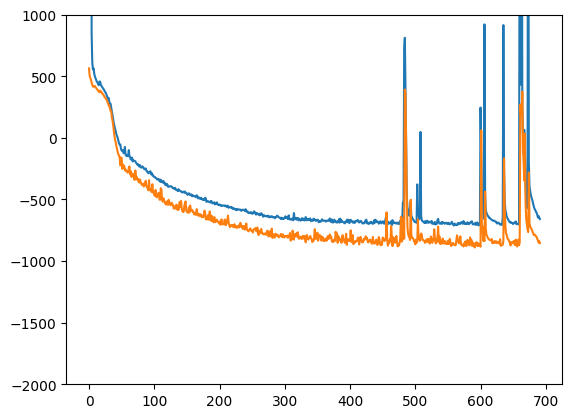

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  predict diverge [ 7.64177787 32.35411159] [2.12897513 3.39731858] [271.30075  30.     ] [135.65038  15.     ] sim_timestep 52
48  predict diverge [73.06452783 52.01494757] [ 2.96446595 24.71466185] [271.30075  30.     ] [135.65038  15.     ] sim_timestep 121
49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  predict diverge [ 9.27353811 40.07607458] [ 1.45998858 23.40747069] [271.30075  30.     ] [135.65038  15.     ] sim_timestep 20
49  50  51  52  53  54  55  56  57  58 

実環境方策rollout vs Sim環境方策rollout


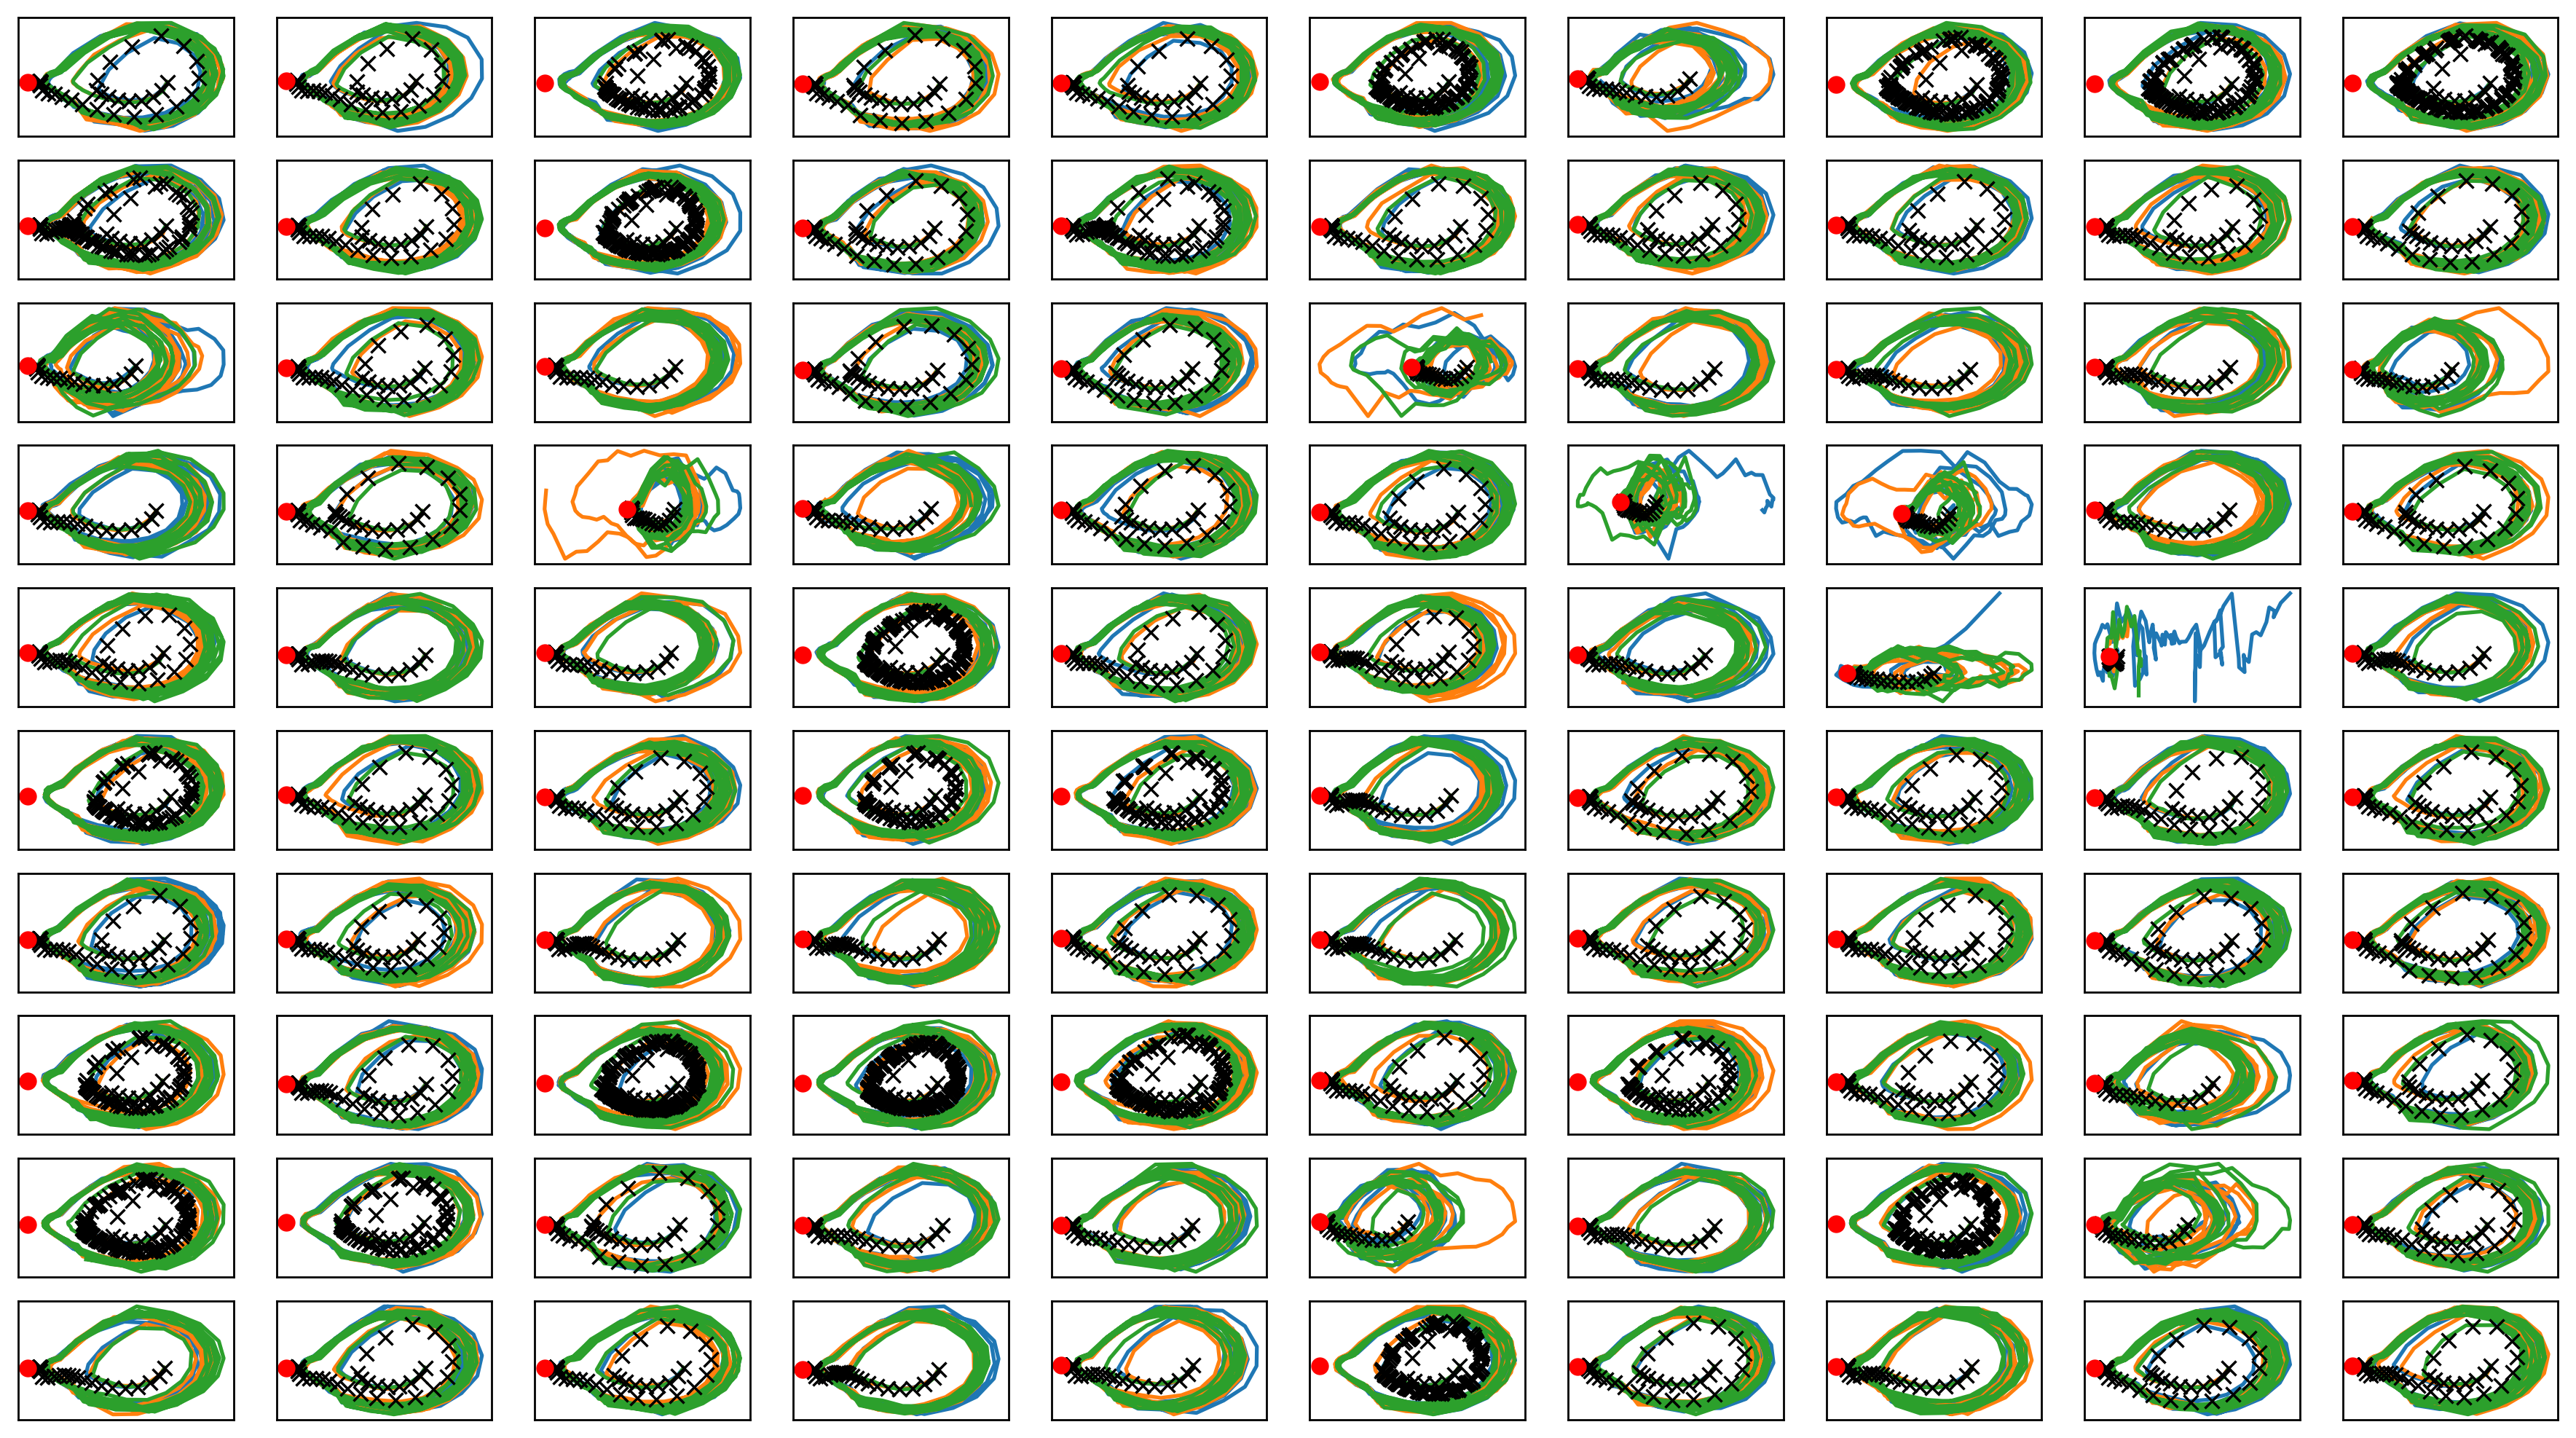

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

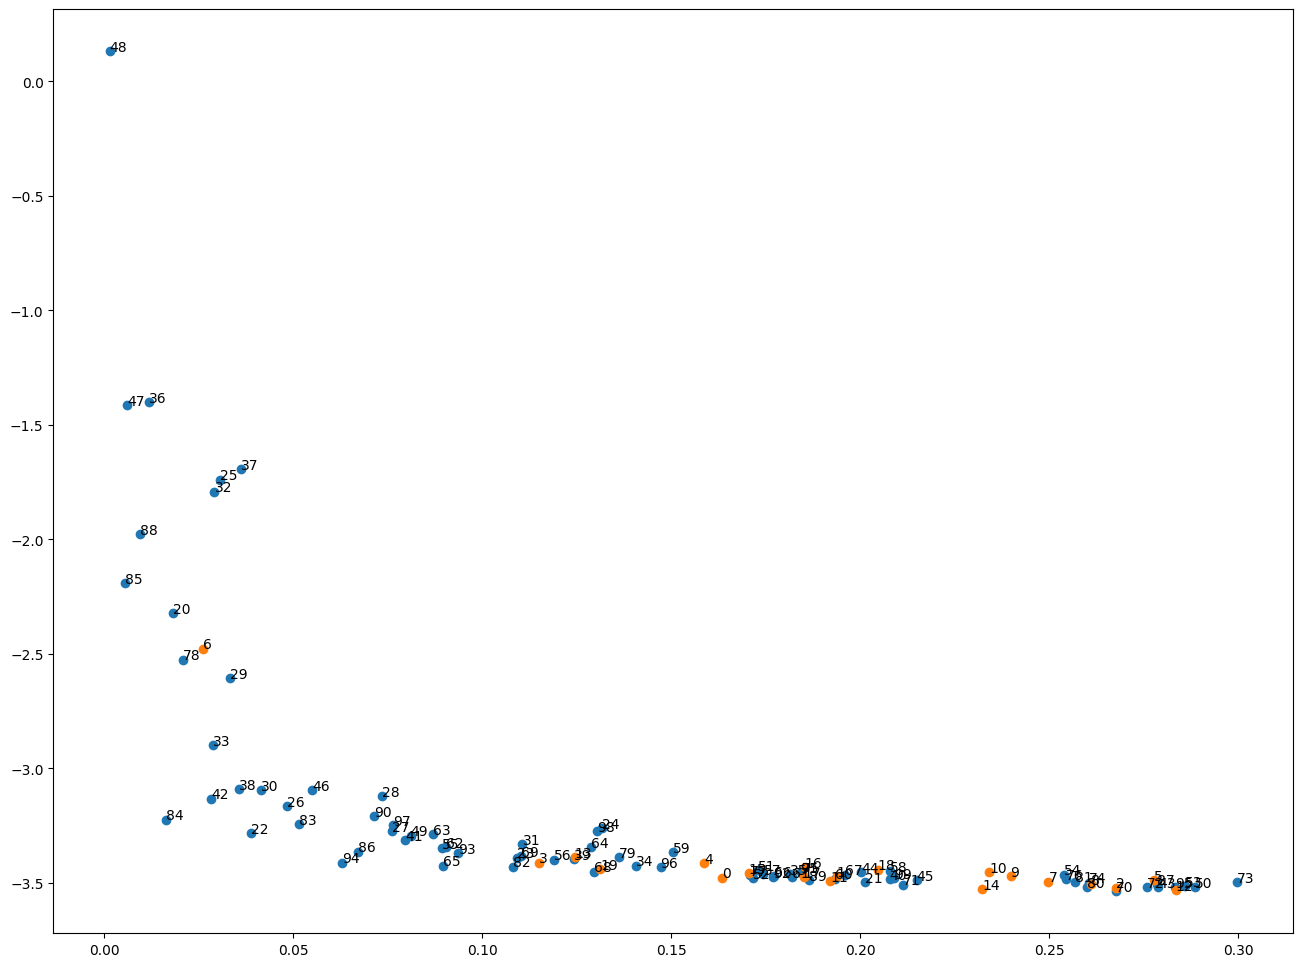

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


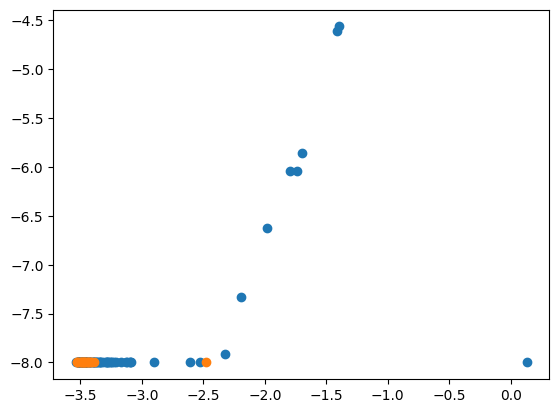

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 5.83700  validloss 6.77609±0.00000  bestvalidloss 6.77609  last_update 0
train: iter 1  trainloss 5.31919  validloss 6.16875±0.00000  bestvalidloss 6.16875  last_update 0
train: iter 2  trainloss 4.89984  validloss 5.64226±0.00000  bestvalidloss 5.64226  last_update 0
train: iter 3  trainloss 4.52397  validloss 5.18790±0.00000  bestvalidloss 5.18790  last_update 0
train: iter 4  trainloss 4.21285  validloss 4.81259±0.00000  bestvalidloss 4.81259  last_update 0
train: iter 5  trainloss 3.94344  validloss 4.47795±0.00000  bestvalidloss 4.47795  last_update 0
train: iter 6  trainloss 3.70486  validloss 4.21071±0.00000  bestvalidloss 4.21071  last_update 0
train: iter 7  trainloss 3.51070  validloss 3.95809±0.00000  bestvalidloss 3.95809  last_update 0
train: iter 8  trainloss 3.33497  validloss 3.74253±0.00000  bestvalidloss 3.74253  last_update 0
train: iter 9  trainloss 3.17907  validloss 3.54560±0.00000  bestvalidloss 3.54560  last_update 0
train: iter 10  trai

train: iter 89  trainloss 0.97127  validloss 0.71669±0.00000  bestvalidloss 0.71669  last_update 0
train: iter 90  trainloss 0.97544  validloss 0.71483±0.00000  bestvalidloss 0.71483  last_update 0
train: iter 91  trainloss 0.98545  validloss 0.71191±0.00000  bestvalidloss 0.71191  last_update 0
train: iter 92  trainloss 0.97319  validloss 0.70851±0.00000  bestvalidloss 0.70851  last_update 0
train: iter 93  trainloss 0.98173  validloss 0.70404±0.00000  bestvalidloss 0.70404  last_update 0
train: iter 94  trainloss 0.96969  validloss 0.69844±0.00000  bestvalidloss 0.69844  last_update 0
train: iter 95  trainloss 0.96497  validloss 0.69553±0.00000  bestvalidloss 0.69553  last_update 0
train: iter 96  trainloss 0.95479  validloss 0.68986±0.00000  bestvalidloss 0.68986  last_update 0
train: iter 97  trainloss 0.96782  validloss 0.69287±0.00000  bestvalidloss 0.68986  last_update 1
train: iter 98  trainloss 0.96288  validloss 0.68826±0.00000  bestvalidloss 0.68826  last_update 0
train: ite

train: iter 176  trainloss 0.94017  validloss 0.61056±0.00000  bestvalidloss 0.60384  last_update 5
train: iter 177  trainloss 0.95123  validloss 0.60964±0.00000  bestvalidloss 0.60384  last_update 6
train: iter 178  trainloss 0.95583  validloss 0.60784±0.00000  bestvalidloss 0.60384  last_update 7
train: iter 179  trainloss 0.96724  validloss 0.60328±0.00000  bestvalidloss 0.60328  last_update 0
train: iter 180  trainloss 0.95892  validloss 0.60902±0.00000  bestvalidloss 0.60328  last_update 1
train: iter 181  trainloss 0.94781  validloss 0.60326±0.00000  bestvalidloss 0.60326  last_update 0
train: iter 182  trainloss 0.95928  validloss 0.60218±0.00000  bestvalidloss 0.60218  last_update 0
train: iter 183  trainloss 0.94729  validloss 0.59887±0.00000  bestvalidloss 0.59887  last_update 0
train: iter 184  trainloss 0.95284  validloss 0.60841±0.00000  bestvalidloss 0.59887  last_update 1
train: iter 185  trainloss 0.95147  validloss 0.59844±0.00000  bestvalidloss 0.59844  last_update 0


train: iter 264  trainloss 0.95219  validloss 0.59638±0.00000  bestvalidloss 0.58994  last_update 35
train: iter 265  trainloss 0.94962  validloss 0.59609±0.00000  bestvalidloss 0.58994  last_update 36
train: iter 266  trainloss 0.95085  validloss 0.58887±0.00000  bestvalidloss 0.58887  last_update 0
train: iter 267  trainloss 0.95044  validloss 0.59642±0.00000  bestvalidloss 0.58887  last_update 1
train: iter 268  trainloss 0.95303  validloss 0.59526±0.00000  bestvalidloss 0.58887  last_update 2
train: iter 269  trainloss 0.93707  validloss 0.58934±0.00000  bestvalidloss 0.58887  last_update 3
train: iter 270  trainloss 0.96006  validloss 0.59955±0.00000  bestvalidloss 0.58887  last_update 4
train: iter 271  trainloss 0.95121  validloss 0.59130±0.00000  bestvalidloss 0.58887  last_update 5
train: iter 272  trainloss 0.94863  validloss 0.59629±0.00000  bestvalidloss 0.58887  last_update 6
train: iter 273  trainloss 0.94511  validloss 0.60264±0.00000  bestvalidloss 0.58887  last_update 

train: iter 348  trainloss 0.96872  validloss 0.59768±0.00000  bestvalidloss 0.58382  last_update 31
train: iter 349  trainloss 0.94582  validloss 0.59260±0.00000  bestvalidloss 0.58382  last_update 32
train: iter 350  trainloss 0.95074  validloss 0.59468±0.00000  bestvalidloss 0.58382  last_update 33
train: iter 351  trainloss 0.95434  validloss 0.59739±0.00000  bestvalidloss 0.58382  last_update 34
train: iter 352  trainloss 0.95874  validloss 0.59420±0.00000  bestvalidloss 0.58382  last_update 35
train: iter 353  trainloss 0.96506  validloss 0.59559±0.00000  bestvalidloss 0.58382  last_update 36
train: iter 354  trainloss 0.95332  validloss 0.59984±0.00000  bestvalidloss 0.58382  last_update 37
train: iter 355  trainloss 0.95401  validloss 0.60076±0.00000  bestvalidloss 0.58382  last_update 38
train: iter 356  trainloss 0.96532  validloss 0.59797±0.00000  bestvalidloss 0.58382  last_update 39
train: iter 357  trainloss 0.96350  validloss 0.59786±0.00000  bestvalidloss 0.58382  last_

train: iter 434  trainloss 0.94346  validloss 0.59807±0.00000  bestvalidloss 0.58313  last_update 29
train: iter 435  trainloss 0.95657  validloss 0.59816±0.00000  bestvalidloss 0.58313  last_update 30
train: iter 436  trainloss 0.94010  validloss 0.59315±0.00000  bestvalidloss 0.58313  last_update 31
train: iter 437  trainloss 0.96457  validloss 0.60118±0.00000  bestvalidloss 0.58313  last_update 32
train: iter 438  trainloss 0.97992  validloss 0.58948±0.00000  bestvalidloss 0.58313  last_update 33
train: iter 439  trainloss 0.94110  validloss 0.59488±0.00000  bestvalidloss 0.58313  last_update 34
train: iter 440  trainloss 0.95265  validloss 0.58779±0.00000  bestvalidloss 0.58313  last_update 35
train: iter 441  trainloss 0.95318  validloss 0.59804±0.00000  bestvalidloss 0.58313  last_update 36
train: iter 442  trainloss 0.96335  validloss 0.59669±0.00000  bestvalidloss 0.58313  last_update 37
train: iter 443  trainloss 0.94867  validloss 0.59651±0.00000  bestvalidloss 0.58313  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-3.1656, -0.9391], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 16.04033  validloss 23.10734±0.00000  bestvalidloss 23.10734  last_update 0
train: iter 1  trainloss 9.39623  validloss 13.29278±0.00000  bestvalidloss 13.29278  last_update 0
train: iter 2  trainloss 6.90502  validloss 7.28149±0.00000  bestvalidloss 7.28149  last_update 0
train: iter 3  trainloss 5.80212  validloss 4.80537±0.00000  bestvalidloss 4.80537  last_update 0
train: iter 4  trainloss 5.63278  validloss 3.77813±0.00000  bestvalidloss 3.77813  last_update 0
train: iter 5  trainloss 5.30133  validloss 3.31480±0.00000  bestvalidloss 3.31480  last_update 0
train: iter 6  trainloss 4.86472  validloss 3.05568±0.00000  bestvalidloss 3.05568  last_update 0
train: iter 7  trainloss 4.57051  validloss 2.88657±0.00000  bestvalidloss 2.88657  last_update 0
train: iter 8  trainloss 4.42023  validloss 2.73020±0.00000  bestvalidloss 2.73020  last_update 0
train: iter 9  trainloss 4.24609  validloss 2.67426±0.00000  bestvalidloss 2.67426  last_update 0
train: iter 10 

train: iter 84  trainloss 2.70973  validloss 1.90076±0.00000  bestvalidloss 1.68341  last_update 22
train: iter 85  trainloss 3.01305  validloss 1.84643±0.00000  bestvalidloss 1.68341  last_update 23
train: iter 86  trainloss 2.96917  validloss 1.73284±0.00000  bestvalidloss 1.68341  last_update 24
train: iter 87  trainloss 2.89523  validloss 1.81514±0.00000  bestvalidloss 1.68341  last_update 25
train: iter 88  trainloss 2.93890  validloss 1.75748±0.00000  bestvalidloss 1.68341  last_update 26
train: iter 89  trainloss 3.06258  validloss 1.83722±0.00000  bestvalidloss 1.68341  last_update 27
train: iter 90  trainloss 2.92031  validloss 1.79708±0.00000  bestvalidloss 1.68341  last_update 28
train: iter 91  trainloss 3.16506  validloss 1.83012±0.00000  bestvalidloss 1.68341  last_update 29
train: iter 92  trainloss 3.09360  validloss 1.76558±0.00000  bestvalidloss 1.68341  last_update 30
train: iter 93  trainloss 2.80243  validloss 1.90862±0.00000  bestvalidloss 1.68341  last_update 31


train: iter 167  trainloss 2.84385  validloss 1.74700±0.00000  bestvalidloss 1.63059  last_update 51
train: iter 168  trainloss 2.97158  validloss 1.78692±0.00000  bestvalidloss 1.63059  last_update 52
train: iter 169  trainloss 2.87925  validloss 1.78991±0.00000  bestvalidloss 1.63059  last_update 53
train: iter 170  trainloss 3.01028  validloss 1.74982±0.00000  bestvalidloss 1.63059  last_update 54
train: iter 171  trainloss 2.91202  validloss 1.77949±0.00000  bestvalidloss 1.63059  last_update 55
train: iter 172  trainloss 3.16199  validloss 1.87522±0.00000  bestvalidloss 1.63059  last_update 56
train: iter 173  trainloss 3.04861  validloss 1.78180±0.00000  bestvalidloss 1.63059  last_update 57
train: iter 174  trainloss 2.82422  validloss 1.92415±0.00000  bestvalidloss 1.63059  last_update 58
train: iter 175  trainloss 2.91695  validloss 1.86398±0.00000  bestvalidloss 1.63059  last_update 59
train: iter 176  trainloss 2.99866  validloss 1.79289±0.00000  bestvalidloss 1.63059  last_

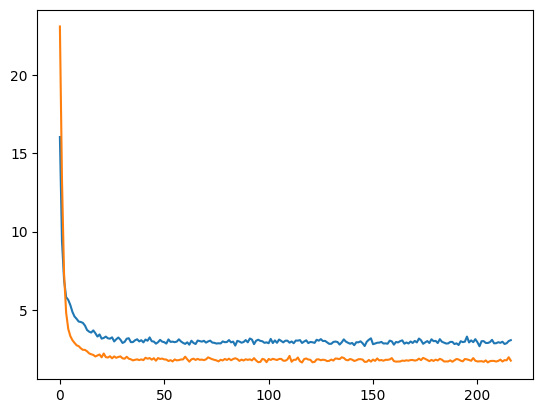

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-4.1047)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(5.4341)


In [21]:
print(vi.h_min_tilde)

-5.705839


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.37385412513138055
tensor([0.5385])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

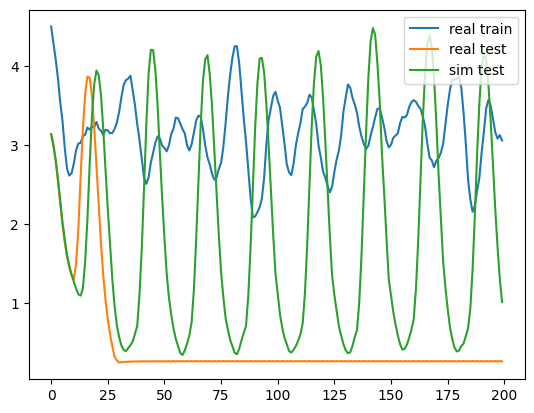

encoder [-3.4402416 -8.       ]
initial_belief tensor([-3.1656, -0.9391])
real train tensor([-3.4269, -8.0014])
real test tensor([ 0.1092, -7.9892])
sim tensor([-3.4810, -7.9898])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-3.4489795918367347


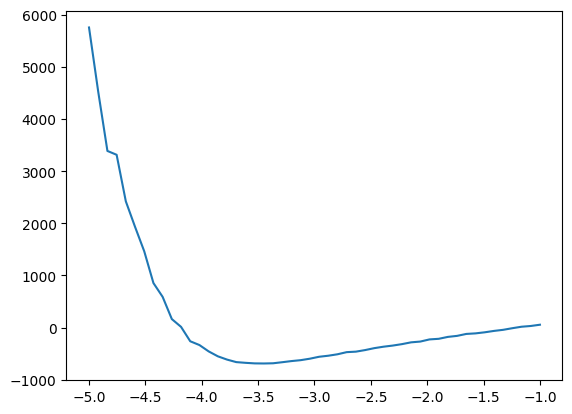

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.7792607123207894
tensor([-1.2660])
